<a href="https://colab.research.google.com/github/Prqtection2/basic-deep-neural-network/blob/main/BasicDNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mtde226/BCADataRepo/main/fulldata.txt')
data.head()

,flag,iflag,i,j,k,mass,Y,Z,time,grav,Teff,FeH,logL,IBand,Ierr,VI,VIerr
0,3.0,5.0,0.0,0.0,1.0,0.0,0.0,0.870921,0.758150,0.000000,0.110150,0.965306,0.654523,0.716373,0.674897,0.803338,0.679412
1,3.0,4.0,0.0,0.0,2.0,0.0,0.0,0.758498,0.862740,0.016893,0.134578,0.947531,0.655102,0.678960,0.617284,0.764234,0.620588
2,3.0,3.0,0.0,0.0,3.0,0.0,0.0,0.660581,0.661849,0.034392,0.160022,0.929982,0.655138,0.641903,0.561043,0.725949,0.561765
3,3.0,2.0,0.0,0.0,4.0,0.0,0.0,0.575299,0.644260,0.050628,0.183835,0.912535,0.654717,0.608765,0.511660,0.691918,0.508824
4,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.501022,0.503204,0.064958,0.205047,0.895179,0.654037,0.580260,0.481481,0.662795,0.482353


In [ ]:
input_cols = ['mass', 'Y', 'Z']

data = data[input_cols + ['flag']]

X_train, X_test, y_train, y_test = train_test_split(data[input_cols], data['flag'], train_size = 0.9)

y_train  = pd.get_dummies(y_train, columns=['flag'])

In [ ]:
print (X_train)

            mass         Y         Z
107679  0.888889  0.000000  0.023665
4149    0.022222  0.555556  0.004241
53864   0.443729  0.177158  0.660581
24242   0.199678  0.088579  0.288167
36392   0.288889  0.644444  0.005696
...          ...       ...       ...
84696   0.688889  0.533333  0.000987
1703    0.000000  0.644444  0.035989
6392    0.044444  0.400000  0.054641
24589   0.199678  0.221447  0.330910
36258   0.288889  0.600000  0.072136

[111042 rows x 3 columns]


In [ ]:
output_cols = y_train.columns.to_list()

In [ ]:
sc = MinMaxScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
dnn_model = Sequential()
dnn_model.add(Input(len(input_cols)))
dnn_model.add(Dense(16, activation = 'relu'))
dnn_model.add(Dense(16, activation = 'relu'))
dnn_model.add(Dense(len(output_cols), activation = 'sigmoid'))

dnn_optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
dnn_model.compile(loss='CategoricalCrossentropy', optimizer=dnn_optimizer)


In [ ]:
dnn_history = dnn_model.fit(X_train, y_train, batch_size=2000, epochs=50, validation_split=1/9)
dnn_prediction = dnn_model.predict(X_test)

print (dnn_prediction)

Epoch 1/50
50/50 [==============================] - 1s 7ms/step - loss: 0.9828 - val_loss: 0.8642
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.7773 - val_loss: 0.7130
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6963 - val_loss: 0.6673
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6450 - val_loss: 0.6037
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5622 - val_loss: 0.5022
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4540 - val_loss: 0.3950
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3608 - val_loss: 0.3198
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2996 - val_loss: 0.2727
Epoch 9/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2611 - val_loss: 0.2426
Epoch 10/50
50/50 [==============================] - 0s 4ms/step - loss: 0.2361 - val_loss: 0.2232
Epoch 11/50
50/50 [

In [ ]:
class_predictions = []
for i in range(len(dnn_prediction)):
  index = np.argmax(dnn_prediction[i])
  if index:
    class_predictions.append(index+1)
  else:
    class_predictions.append(index)

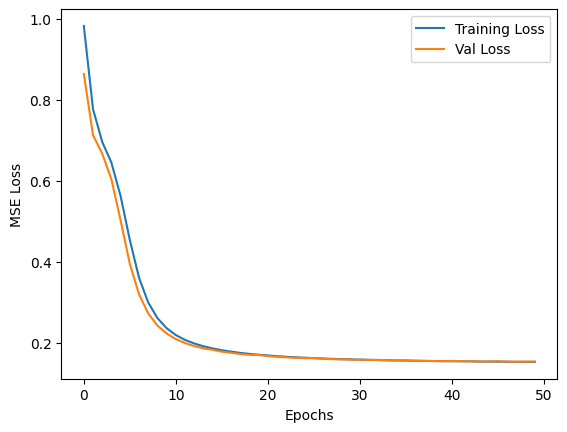

In [ ]:
plt.figure()
plt.plot(dnn_history.history['loss'], label='Training Loss')
plt.plot(dnn_history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

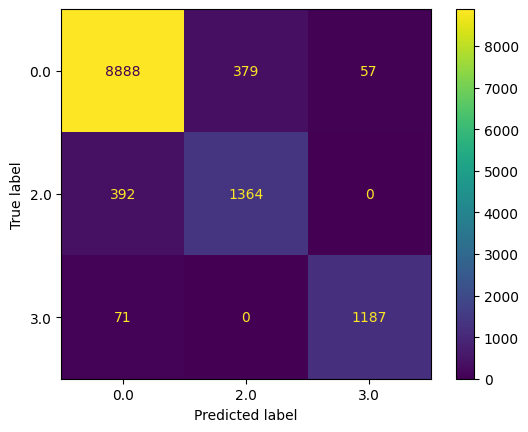

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, class_predictions)
plt.show()